# Cerebral Differentially Expressed Genes in Dementia

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [3]:
txData = pd.read_csv('TCxResults05.csv')
pxData = pd.read_csv('PCxResults05.csv')
hipData = pd.read_csv('HipResults05.csv')
fwmData = pd.read_csv('FWMResults05.csv')

In [4]:
txData.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,LOC105377988,407.337405,5.365150,0.842596,6.367404,1.922545e-10,0.000010
1,RPL39P13,646.069382,5.239792,0.848607,6.174581,6.633914e-10,0.000017
2,AKAP9,1784.186701,5.420859,0.948780,5.713502,1.106743e-08,0.000185
3,LOC100128027,522.010377,4.970087,0.878678,5.656322,1.546516e-08,0.000194
4,LINC00692,1363.033918,5.630601,1.022791,5.505132,3.688914e-08,0.000371


In [5]:
def significantPs(df):
    significantPs = []
    for i in df.padj:
        if i < 0.05:
            significantPs.append(i)
    return significantPs

len(significantPs(txData))

548

In [6]:
significanttxData = txData[:549]
significantpxData = pxData[:len(significantPs(pxData))]
significanthipData = hipData[:len(significantPs(hipData))]
significantfwmData = fwmData[:len(significantPs(fwmData))]

In [7]:
print(len(significantPs(txData)))
print(len(significantPs(pxData)))
print(len(significantPs(hipData)))
print(len(significantPs(fwmData)))

548
546
778
531


In [8]:
significanttxData = significanttxData.sort_values('log2FoldChange', ascending = True)
significantpxData = significantpxData.sort_values('log2FoldChange', ascending = True)
significanthipData = significanthipData.sort_values('log2FoldChange', ascending = True)
significantfwmData = significantfwmData.sort_values('log2FoldChange', ascending = True)

In [9]:
significanttxData = significanttxData[~significanttxData['Unnamed: 0'].str.contains("LOC")]
significantpxData = significantpxData[~significantpxData['Unnamed: 0'].str.contains("LOC")]
significanthipData = significanthipData[~significanthipData['Unnamed: 0'].str.contains("LOC")]
significantfwmData = significantfwmData[~significantfwmData['Unnamed: 0'].str.contains("LOC")]

In [10]:
upRegTx = significanttxData[significanttxData.log2FoldChange >= 2]
downRegTx = significanttxData[significanttxData.log2FoldChange <= 2]
enrichedTx = upRegTx.append(downRegTx)
enrichedTx = enrichedTx.sort_values('log2FoldChange')
enrichedTx.to_csv('enrichedTCx.csv')

In [11]:
upRegPx = significantpxData[significantpxData.log2FoldChange >= 2]
downRegPx = significantpxData[significantpxData.log2FoldChange <= 2]
enrichedPx = upRegPx.append(downRegPx)
enrichedPx = enrichedPx.sort_values('log2FoldChange')
enrichedPx.to_csv('enrichedPCx.csv')

In [12]:
upRegHip = significanthipData[significanthipData.log2FoldChange >= 2]
downRegHip = significanthipData[significanthipData.log2FoldChange <= 2]
enrichedHip = upRegHip.append(downRegHip)
enrichedHip = enrichedHip.sort_values('log2FoldChange')
enrichedHip.to_csv('enrichedHip.csv')

In [13]:
upRegFWM = significantfwmData[significantfwmData.log2FoldChange >= 2]
downRegFWM = significantfwmData[significantfwmData.log2FoldChange <= 2]
enrichedFWM = upRegFWM.append(downRegFWM)
enrichedFWM = enrichedFWM.sort_values('log2FoldChange')
enrichedFWM.to_csv('enrichedFWM.csv')

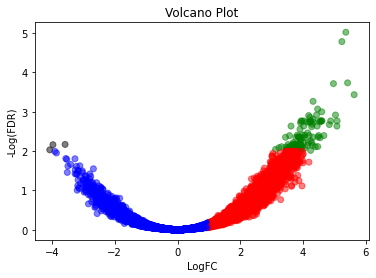

In [14]:
def volcano(df):

    

    fdr = df['padj']

    logfc = df['log2FoldChange']



    # If logfc > 1 and fdr < 1.9999 (meaning p=0.01) -> red ("up" very sure)

    # elsif fdr < 1.999 (meaning p=0.01) -> blue ('down' very sure)

    # elsif logfc > 1 ( meaning with high FDR) green

    # else logfc < 1 fdr > 1.9999 black

    # np.where(condition, then, else) it can be nested np.where(condition, then, np.where(condition, then, else))

    col = np.where((logfc > 1) & (fdr < 1.99999),'r', np.where(fdr < 1.99999,'b', np.where(logfc > 1,'g','k')))



    plt.scatter(logfc, fdr,  c=col, alpha=0.5)

    plt.title('Volcano Plot')

    plt.xlabel('LogFC')

    plt.ylabel('-Log(FDR)')
    plt.savefig('VolcanoDE.png')
    
    plt.show()

    

    



df_volcano_t1 = txData.loc[:, ['padj','log2FoldChange']]

df_volcano_t1['padj'] = df_volcano_t1['padj'].apply(np.log10).apply(lambda x: x * (-1))



volcano(df_volcano_t1)

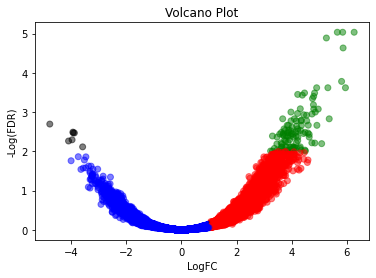

In [15]:
df_volcano_px = pxData.loc[:, ['padj','log2FoldChange']]

df_volcano_px['padj'] = df_volcano_px['padj'].apply(np.log10).apply(lambda x: x * (-1))



volcano(df_volcano_px)

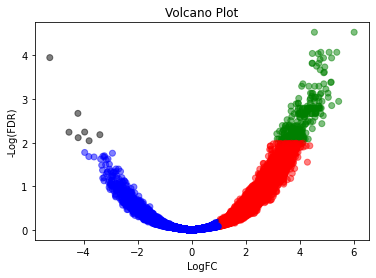

In [16]:
df_volcano_hip = hipData.loc[:, ['padj','log2FoldChange']]

df_volcano_hip['padj'] = df_volcano_hip['padj'].apply(np.log10).apply(lambda x: x * (-1))



volcano(df_volcano_hip)

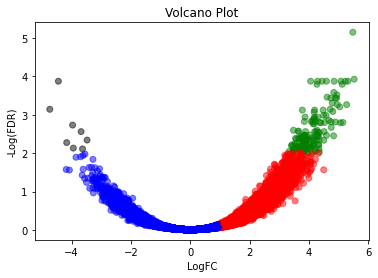

In [17]:
df_volcano_fwm = fwmData.loc[:, ['padj','log2FoldChange']]

df_volcano_fwm['padj'] = df_volcano_fwm['padj'].apply(np.log10).apply(lambda x: x * (-1))



volcano(df_volcano_fwm)

In [18]:
enrichedTx.head(10)

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
105,NMTRQ-TTG10-1,544.052257,-4.070476,0.954318,-4.265326,0.000020,0.009300
74,PIBF1,1213.183276,-3.970826,0.900150,-4.411295,0.000010,0.006889
179,HORMAD2,877.271442,-3.558738,0.882598,-4.032119,0.000055,0.015423
270,PPP1CB,813.629632,-3.492058,0.912534,-3.826770,0.000130,0.024002
242,ATP5J2,778.975629,-3.407720,0.878486,-3.879081,0.000105,0.021757
183,HPCAL1,1496.349308,-3.268306,0.812278,-4.023631,0.000057,0.015660
323,RPL17P2,1099.162852,-3.260464,0.874551,-3.728156,0.000193,0.029898
413,PCDHGA9,638.773502,-3.220713,0.894865,-3.599103,0.000319,0.038717
278,HACD1,1575.501078,-3.219505,0.843796,-3.815501,0.000136,0.024493
393,CERS3,515.399421,-3.202985,0.884686,-3.620475,0.000294,0.037432


In [19]:
enrichedTx.tail(10)

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
7,CNGB3,461.285312,4.597195,0.877298,5.240175,1.604244e-07,0.001008
19,LINC00551,483.167258,4.607427,0.927699,4.966511,6.816835e-07,0.001717
43,ZNF736P1Y,662.243863,4.666313,1.006300,4.637100,3.533317e-06,0.004038
21,EEF1A1P31,760.845740,4.882287,0.980802,4.977853,6.429351e-07,0.001717
8,RPL31P22,601.969591,5.035006,0.975043,5.163883,2.418791e-07,0.001216
34,NLGN4Y,354.458088,5.081766,1.059562,4.796102,1.617832e-06,0.002324
14,LINC01118,372.796208,5.087539,1.028047,4.948743,7.469421e-07,0.001717
1,RPL39P13,646.069382,5.239792,0.848607,6.174581,6.633914e-10,0.000017
2,AKAP9,1784.186701,5.420859,0.948780,5.713502,1.106743e-08,0.000185
4,LINC00692,1363.033918,5.630601,1.022791,5.505132,3.688914e-08,0.000371


In [20]:
def DEGenes(df):
    DifExpGenes = list()
    for gene in df['Unnamed: 0']:
        DifExpGenes.append(gene)
    return DifExpGenes

upRegGenesTx = DEGenes(upRegTx)
print(len(upRegGenesTx))

363


In [21]:
downRegGenesTx = DEGenes(downRegTx)
print(len(downRegGenesTx))

17


In [22]:
upRegGenesPx = DEGenes(upRegPx)
downRegGenesPx = DEGenes(downRegPx)

upRegGenesHip = DEGenes(upRegHip)
downRegGenesHip = DEGenes(downRegHip)

upRegGenesFWM = DEGenes(upRegFWM)
downRegGenesFWM = DEGenes(downRegFWM)

In [23]:
print(len(upRegGenesPx))
print(len(downRegGenesPx))

356
19


In [24]:
print(len(upRegGenesHip))
print(len(downRegGenesHip))

print(len(upRegGenesFWM))
print(len(downRegGenesFWM))

480
20
351
23


In [25]:
def printGene(listOfGenes):
    for gene in listOfGenes:
        print(gene)
print('Up regulated genes in Temporal Cortex during Dementia:\n')
print(len(upRegGenesTx))


Up regulated genes in Temporal Cortex during Dementia:

363


Essa lista de genes upregulated no córtex temporal durante a demência inclui proteínas que fazem parte de algumas vias importantes. Segundo o banco de dados STRING, parte dos genes nessa lista estão envolvidos com a via da infecção por papilomavirus humano, vias de interações entre receptores de citocinas, via da sinalização PI3K-Akt, complexo KRAB-ZNF/KAP, entre outros.

In [26]:
print('Down regulated genes in Temporal Cortex during Dementia:\n')
printGene(downRegGenesTx)

Down regulated genes in Temporal Cortex during Dementia:

NMTRQ-TTG10-1
PIBF1
HORMAD2
PPP1CB
ATP5J2
HPCAL1
RPL17P2
PCDHGA9
HACD1
CERS3
SDAD1
ZDHHC1
YEATS4
MIR4472-1
ZDHHC15
TNFAIP8L1
NDUFB1P2


In [27]:
from ipywidgets import interact

In [39]:
@interact
def show_goi(Gene = ''):
    print('This analysis compares the RNA-Seq expression in the Temporal Cortex of patients with and without dementia. \nInput your gene of interest (GOI)')
    return txData[txData['Unnamed: 0'] == Gene.upper()]

interactive(children=(Text(value='', description='Gene'), Output()), _dom_classes=('widget-interact',))

In [40]:
@interact
def show_goi(Gene = ''):
    print('This analysis compares the RNA-Seq expression in the Parietal Cortex of patients with and without dementia. \nInput your gene of interest (GOI)')
    return pxData[pxData['Unnamed: 0'] == Gene.upper()]

interactive(children=(Text(value='', description='Gene'), Output()), _dom_classes=('widget-interact',))

In [41]:
@interact
def show_goi(Gene = ''):
    print('This analysis compares the RNA-Seq expression in the Hippocampus of patients with and without dementia. \nInput your gene of interest (GOI)')
    return hipData[hipData['Unnamed: 0'] == Gene.upper()]

interactive(children=(Text(value='', description='Gene'), Output()), _dom_classes=('widget-interact',))

In [42]:
@interact
def show_goi(Gene = ''):
    print('This analysis compares the RNA-Seq expression in the Frontal White Matter of patients with and without dementia. \nInput your gene of interest (GOI)')
    return fwmData[fwmData['Unnamed: 0'] == Gene.upper()]

interactive(children=(Text(value='', description='Gene'), Output()), _dom_classes=('widget-interact',))

In [32]:
print('Up regulated genes in Parietal Cortex during Dementia:\n')
print(len(upRegGenesPx))
print()
print('Down regulated genes in Parietal Cortex during Dementia:\n')
print(len(downRegGenesPx))

Up regulated genes in Parietal Cortex during Dementia:

356

Down regulated genes in Parietal Cortex during Dementia:

19


In [33]:
print('Up regulated genes in Hipothalamus during Dementia:\n')
printGene(upRegGenesHip)
print()
print('Down regulated genes in Hipothalamus during Dementia:\n')
printGene(downRegGenesHip)

Up regulated genes in Hipothalamus during Dementia:

SNORD105B
MATN1-AS1
EIF4EP2
TCEB3CL
LDHAL6B
MICE
C1orf52
PPP1R10
RPS2P48
C2orf74
MIR548AA2
MIR6830
UHRF2
C2orf72
LACTB2
TK1
RPN2
HOXB-AS3
TAAR6
KNOP1P1
MIR4723
OR4C5
HMGB3P14
CSTF3-AS1
ORMDL1
OR51P1P
SLC19A3
NAV2-AS4
TRAJ16
FTLP6
POTEJ
RTN4R
TCP11X1
NPM1P22
LCE1E
PCIF1
TYK2
RPS26P34
MTND4P12
CAP1
VN1R92P
MARK2P1
FRZB
SFPQP1
ZNF616
RAP2B
TNFRSF1B
SNORA71E
TCF4
LRP10
MYF5
RNA5SP114
SLC26A7
NKAIN1
ZNF652
LINC00523
SPAG6
MIR28
FBP2P1
PGM2L1
WRN
RNA5SP506
MIR7843
LINC01213
RAD23BLP
PSMC1
CX3CL1
TRAF2
OR2W3
IGLC1
MTERF2
KCNK3
NIP7P3
HP09053
PTCD2P1
OFD1
CALML3-AS1
ATP1B1P1
SNX2
FAM204CP
NIPAL4
MIR4461
MRPL20P1
NCLN
RPL27AP8
CALM2P2
HCG4P11
SLC22A5
FZD9
LINCR-0002
GDPD5
VSX2
VSTM5
CCR8
NMNAT1
GTF3C4
BAZ1B
NACAP6
RPS27P16
HOXC-AS3
MTND4P13
CLYBL
MIR6815
PHKG2
GLUD1P4
NLGN1
CHP1
CBX6
DEPDC7
MIR4436B2
LINC00888
MIR6821
SNRK-AS1
MMP24
MIR585
SLC25A2
LINC01519
HIST1H3A
RNA5SP341
TCEAL7
COA5
WRNIP1
MEMO1P3
CLN3
MARCH9
PLEKHD1
GRAMD4P2
PRAMEF20
RP

In [34]:
print('Up regulated genes in Frontal White Matter during Dementia:\n')
printGene(upRegGenesFWM)
print()
print('Down regulated genes in Frontal White Matter during Dementia:\n')
printGene(downRegGenesFWM)

Up regulated genes in Frontal White Matter during Dementia:

SUCLA2P2
HAGLR
RPL21P136
PODXL
PAQR3
SPATA3
SORD2P
RPS3AP11
RPS3AP33
LINC01069
TRF-GAA12-1
SIGLEC18P
CIAPIN1
RERG
CDC23
RNF112
MT1L
HIST1H3I
LPO
METTL14
PDE1C
TCTN3
HCG18
DLGAP1
RPL9P31
SMN1
LETM1
CTNNA2
RPL18P13
BNIP3P1
MIR610
RFTN1P1
DPY19L2P3
ANO7P1
GAPDHP64
CH25H
MIR548AV
DEDD2
MIR6511A3
RIMKLBP2
ARNT2
CLSTN3
MTIF2P1
CT47A9
ANKRD55
C1orf54
CCDC13-AS1
MARK2P11
DCAF4L2
GPR176
GALR2
SNORD115-47
TPTEP1
SNORD115-13
PBK
DNM1P27
HHAT
SPATA31E2P
OXT
TRBV6-4
VAPA
RPL5P9
MIR144
OR5H8
STX7
UQCRC2P1
RPSAP29
MIR3131
HLA-DPA3
LAMA1
RNU12-2P
LINC01265
RRP15
RNF114
KDSR
NUMB
MIR4523
MIR4781
ASPSCR1
OR4F5
DEFB108P4
RPS2P32
NDC1
KRTAP26-1
GADL1
METTL6
SNORD114-10
GTF2I
IGHD1-1
DRG2
SNORD112
ERVV-1
DGCR2
PCAT29
VPS13B
SEPT6
MED8
PM20D1
CREB5
PDLIM1
PAN3-AS1
MIR4426
FAM24B
MRPL42P3
FAM19A2
ESF1
RPL21P74
TRIM47
OTX2-AS1
SLX1A-SULT1A3
HOXA10-AS
SRIP2
MIR3935
PTTG1IP
C11orf68
AQP8
SAR1AP3
COG3
KCNRG
PDHB
AKR1B1P3
NIP7
OR5A1
CHMP5
SIM1
TIGD2
EIF

In [35]:
enrichedGenesTx = pd.DataFrame(enrichedTx, columns=['Unnamed: 0', 'log2FoldChange'])

enrichedGenesPx = pd.DataFrame(enrichedPx, columns=['Unnamed: 0', 'log2FoldChange'])

enrichedGenesHip = pd.DataFrame(enrichedHip, columns=['Unnamed: 0', 'log2FoldChange'])

enrichedGenesFWM = pd.DataFrame(enrichedFWM, columns=['Unnamed: 0', 'log2FoldChange'])

In [36]:
enrichedGenesTx

,Unnamed: 0,log2FoldChange
105,NMTRQ-TTG10-1,-4.070476
74,PIBF1,-3.970826
179,HORMAD2,-3.558738
270,PPP1CB,-3.492058
242,ATP5J2,-3.407720
...,...,...
34,NLGN4Y,5.081766
14,LINC01118,5.087539
1,RPL39P13,5.239792
2,AKAP9,5.420859


In [37]:
#df_merge_col = pd.merge(df_row, df3, on='id')
enrichedDementia = pd.merge(enrichedGenesTx, enrichedGenesPx, on='Unnamed: 0', how='outer')
enrichedDementia = pd.merge(enrichedDementia, enrichedGenesHip, on='Unnamed: 0', how='outer')
enrichedDementia = pd.merge(enrichedDementia, enrichedGenesFWM, on='Unnamed: 0', how='outer')
#enrichedDementia.rename(columns={'log2FoldChange_x': 'TemporalCortex', 'log2FoldChange_y': 'ParietalCortex', 'log2FoldChange_x': 'Hypothalamus', 'log2FoldChange_y': 'FWM'})
enrichedDementia.columns = ['Gene', 'TemporalCortex', 'ParietalCortex', 'Hipothalamus', 'FWM']
enrichedDementia

,Gene,TemporalCortex,ParietalCortex,Hipothalamus,FWM
0,NMTRQ-TTG10-1,-4.070476,NaN,NaN,4.013045
1,PIBF1,-3.970826,NaN,NaN,NaN
2,HORMAD2,-3.558738,NaN,NaN,NaN
3,PPP1CB,-3.492058,NaN,NaN,NaN
4,ATP5J2,-3.407720,NaN,NaN,NaN
...,...,...,...,...,...
1598,COX20,NaN,NaN,NaN,5.146079
1599,AP3S1,NaN,NaN,NaN,5.229525
1600,PDCD11,NaN,NaN,NaN,5.317365
1601,TRBJ1-2,NaN,NaN,NaN,5.482107


In [37]:
sharedTxHipGenes = ['MTND4P13', 'RPS27AP4', 'TIMM23B', 'KRT18P7', 'SLC26A7', 'TYK2']
df1 = pd.DataFrame()
for gene in sharedTxHipGenes:
    df1 = df1.append(txData[txData['Unnamed: 0'] == gene])
    
df2 = pd.DataFrame()
for gene in sharedTxHipGenes:
    df2 = df2.append(hipData[hipData['Unnamed: 0'] == gene])

df1.columns = ['TC ' + str(x) for x in df1.columns]
df1.rename(columns = {'TC Unnamed: 0': 'Gene'}, inplace = True)
df2.columns = ['Hip ' + str(x) for x in df2.columns]
df2.rename(columns = {'Hip Unnamed: 0': 'Gene'}, inplace = True)

sharedTxHip = df1.merge(df2, on = 'Gene')

In [38]:
sharedHipFWMGenes = ['OR4C5', 'NINJ2', 'COL5A2', 'PBK', 'PAN3-AS1']
df1 = pd.DataFrame()
for gene in sharedHipFWMGenes:
    df1 = df1.append(hipData[hipData['Unnamed: 0'] == gene])
    
df2 = pd.DataFrame()
for gene in sharedHipFWMGenes:
    df2 = df2.append(fwmData[fwmData['Unnamed: 0'] == gene])

df1.columns = ['Hip ' + str(x) for x in df1.columns]
df1.rename(columns = {'Hip Unnamed: 0': 'Gene'}, inplace = True)
df2.columns = ['FWM ' + str(x) for x in df2.columns]
df2.rename(columns = {'FWM Unnamed: 0': 'Gene'}, inplace = True)

sharedHipFWM = df1.merge(df2, on = 'Gene')

In [39]:
sharedPcFWMGenes = ['RPL7AP67', 'EIF3EP2', 'PAN3-AS1']
df1 = pd.DataFrame()
for gene in sharedPcFWMGenes:
    df1 = df1.append(pxData[pxData['Unnamed: 0'] == gene])
    
df2 = pd.DataFrame()
for gene in sharedPcFWMGenes:
    df2 = df2.append(fwmData[fwmData['Unnamed: 0'] == gene])

df1.columns = ['PC ' + str(x) for x in df1.columns]
df1.rename(columns = {'PC Unnamed: 0': 'Gene'}, inplace = True)
df2.columns = ['FWM ' + str(x) for x in df2.columns]
df2.rename(columns = {'FWM Unnamed: 0': 'Gene'}, inplace = True)

sharedPcFWM = df1.merge(df2, on = 'Gene')

In [40]:
sharedPxHipGenes = ['FPGT.TNNI3K', 'MIR181C', 'NPM1P31', 'PAN3-AS1']
df1 = pd.DataFrame()
for gene in sharedPxHipGenes:
    df1 = df1.append(pxData[pxData['Unnamed: 0'] == gene])
    
df2 = pd.DataFrame()
for gene in sharedPxHipGenes:
    df2 = df2.append(hipData[hipData['Unnamed: 0'] == gene])

df1.columns = ['PC ' + str(x) for x in df1.columns]
df1.rename(columns = {'PC Unnamed: 0': 'Gene'}, inplace = True)
df2.columns = ['Hip ' + str(x) for x in df2.columns]
df2.rename(columns = {'Hip Unnamed: 0': 'Gene'}, inplace = True)

sharedPxHip = df1.merge(df2, on = 'Gene')

In [41]:
sharedTxPxGenes = ['MIR99AHG', 'KSR2', 'CCR3', 'DEFB4A', 'SYK', 'TNFRSF21', 'CBX3P4']
df1 = pd.DataFrame()
for gene in sharedTxPxGenes:
    df1 = df1.append(txData[txData['Unnamed: 0'] == gene])
    
df2 = pd.DataFrame()
for gene in sharedTxPxGenes:
    df2 = df2.append(pxData[pxData['Unnamed: 0'] == gene])

df1.columns = ['TC ' + str(x) for x in df1.columns]
df1.rename(columns = {'TC Unnamed: 0': 'Gene'}, inplace = True)
df2.columns = ['PC ' + str(x) for x in df2.columns]
df2.rename(columns = {'PC Unnamed: 0': 'Gene'}, inplace = True)

sharedTxPx = df1.merge(df2, on = 'Gene')

In [42]:
sharedTxFWMGenes = ['COL24A1', 'NMTRQ-TTG10-1']
df1 = pd.DataFrame()
for gene in sharedTxFWMGenes:
    df1 = df1.append(txData[txData['Unnamed: 0'] == gene])
    
df2 = pd.DataFrame()
for gene in sharedTxFWMGenes:
    df2 = df2.append(fwmData[fwmData['Unnamed: 0'] == gene])

df1.columns = ['TC ' + str(x) for x in df1.columns]
df1.rename(columns = {'TC Unnamed: 0': 'Gene'}, inplace = True)
df2.columns = ['FWM ' + str(x) for x in df2.columns]
df2.rename(columns = {'FWM Unnamed: 0': 'Gene'}, inplace = True)

sharedTxFWM = df1.merge(df2, on = 'Gene')

sharedTxHip.to_csv('sharedTxHip.csv')
sharedHipFWM.to_csv('sharedHipFWM.csv')
sharedPcFWM.to_csv('sharedPcFWM.csv')
sharedPxHip.to_csv('sharedPcHip.csv')
sharedTxPx.to_csv('sharedTcPc.csv')

In [43]:
sharedTxHip

,Gene,TC baseMean,TC log2FoldChange,TC lfcSE,TC stat,TC pvalue,TC padj,Hip baseMean,Hip log2FoldChange,Hip lfcSE,Hip stat,Hip pvalue,Hip padj
0,MTND4P13,271.393428,3.473393,0.893307,3.888241,0.000101,0.021332,482.207172,3.168546,0.918953,3.447996,0.000565,0.041409
1,RPS27AP4,620.918064,3.698275,0.830137,4.455016,0.000008,0.006590,506.997118,4.540783,0.959305,4.733407,0.000002,0.001609
2,TIMM23B,347.075121,2.740744,0.760139,3.605583,0.000311,0.038477,413.783688,3.794743,0.881999,4.302432,0.000017,0.005276
3,KRT18P7,356.633609,3.459438,0.937559,3.689835,0.000224,0.031791,325.628672,3.478438,0.787985,4.414346,0.000010,0.004042
4,SLC26A7,463.620207,3.688528,0.822830,4.482734,0.000007,0.006074,443.882099,2.988087,0.872931,3.423050,0.000619,0.043853
5,TYK2,1052.892233,3.456885,0.984148,3.512566,0.000444,0.044606,175.781375,2.950983,0.857519,3.441303,0.000579,0.042248


In [44]:
sharedHipFWM

,Gene,Hip baseMean,Hip log2FoldChange,Hip lfcSE,Hip stat,Hip pvalue,Hip padj,FWM baseMean,FWM log2FoldChange,FWM lfcSE,FWM stat,FWM pvalue,FWM padj
0,OR4C5,543.942178,2.879655,0.834304,3.451566,0.000557,0.041347,640.436913,-3.440767,0.977774,-3.518978,0.000433,0.044728
1,NINJ2,633.623214,3.528098,0.845843,4.171103,0.000030,0.007399,400.376669,3.580748,0.934561,3.831477,0.000127,0.022932
2,COL5A2,317.159810,4.471086,1.026571,4.355361,0.000013,0.004761,411.900441,3.853119,0.896172,4.299532,0.000017,0.006955
3,PBK,559.962036,3.480407,0.970367,3.586693,0.000335,0.029963,390.895554,3.102064,0.842721,3.681007,0.000232,0.031559
4,PAN3-AS1,505.492545,3.735369,0.929268,4.019690,0.000058,0.010540,381.242507,3.236657,0.917764,3.526676,0.000421,0.044373


In [45]:
sharedPcFWM

,Gene,PC baseMean,PC log2FoldChange,PC lfcSE,PC stat,PC pvalue,PC padj,FWM baseMean,FWM log2FoldChange,FWM lfcSE,FWM stat,FWM pvalue,FWM padj
0,RPL7AP67,291.622507,3.389173,0.817992,4.143283,0.000034,0.011900,631.336806,3.595500,1.026747,3.501837,0.000462,0.045526
1,EIF3EP2,667.256546,3.374556,0.902606,3.738683,0.000185,0.027600,320.197973,3.330351,0.791250,4.208972,0.000026,0.009020
2,PAN3-AS1,425.584815,3.134459,0.900602,3.480403,0.000501,0.047859,381.242507,3.236657,0.917764,3.526676,0.000421,0.044373


In [46]:
sharedPxHip

,Gene,PC baseMean,PC log2FoldChange,PC lfcSE,PC stat,PC pvalue,PC padj,Hip baseMean,Hip log2FoldChange,Hip lfcSE,Hip stat,Hip pvalue,Hip padj
0,MIR181C,649.761177,3.959178,0.957234,4.136060,3.533201e-05,0.011900,442.260100,3.704965,0.954597,3.881185,0.000104,0.014818
1,NPM1P31,453.381881,4.908284,0.895960,5.478240,4.295782e-08,0.000240,330.047667,4.458912,0.969155,4.600822,0.000004,0.002159
2,PAN3-AS1,425.584815,3.134459,0.900602,3.480403,5.006597e-04,0.047859,505.492545,3.735369,0.929268,4.019690,0.000058,0.010540


In [47]:
sharedTxPx

,Gene,TC baseMean,TC log2FoldChange,TC lfcSE,TC stat,TC pvalue,TC padj,PC baseMean,PC log2FoldChange,PC lfcSE,PC stat,PC pvalue,PC padj
0,MIR99AHG,410.267483,2.821944,0.804854,3.506155,0.000455,0.045085,376.275726,3.681369,0.973251,3.782548,0.000155,0.025017
1,KSR2,549.860731,2.854717,0.825869,3.456622,0.000547,0.050097,892.124937,3.487808,0.885802,3.937457,0.000082,0.017620
2,CCR3,471.142887,2.895921,0.804667,3.598907,0.000320,0.038717,419.385947,3.327207,0.934581,3.560106,0.000371,0.040554
3,DEFB4A,395.884485,3.114255,0.849599,3.665559,0.000247,0.033721,577.830728,3.450108,0.956084,3.608581,0.000308,0.036085
4,SYK,499.112661,3.274532,0.782778,4.183219,0.000029,0.011061,219.957236,3.526164,0.925127,3.811547,0.000138,0.023633
5,TNFRSF21,580.762183,3.353995,0.877779,3.821001,0.000133,0.024269,1316.627020,-3.374683,0.885756,-3.809947,0.000139,0.023633
6,CBX3P4,249.925662,3.858383,0.902324,4.276050,0.000019,0.009197,566.545480,4.049766,1.100925,3.678511,0.000235,0.031372
